In [258]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [259]:
class Perceptron:
    """ 
    Perceptron Classifier.

    Parameters
    ----------
    eta: float
        Learning Rate (between 0 and 1)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator for random weight initialization

    Attributes
    ----------
    w_: 1d-array
        Weights after fitting
    b_: Scalar
        Bias unit after fitting
    errors_: list
        Number of misclassifications (updates) in each epoch

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        """
        Fit Training Data.

        Parameters
        ----------
        x: {array-like}, shape = [n_examples, n_features] // Descriptive Features
            Training vectors, where n_examples is the number of examples and n_features is the number of features
        y: array-like, shape = [n_examples]               // Target Features
            Target values

        Returns
        -------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [260]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('FROM URL: ',s )

FROM URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [261]:
df = pd.read_csv(s, 
                 header=None,
                 encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


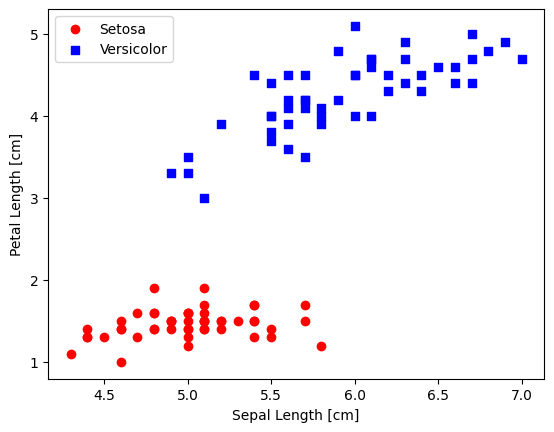

In [262]:
# Select setosa and versicolor of the first 100 entries
y = df.iloc[0:100, 4].values
# Converts Iris-setosa to 0 and Iris-versicolor to 1
y = np.where(y == 'Iris-setosa', 0, 1)

# Select sepal length and petal length of the first 100 entries
X = df.iloc[0:100, [0,2]].values

# Plots first 50 entries of data
# x[50,0] = in the first 50 values, reading from the column at index 0
plt.scatter(X[:50, 0], X[:50, 1], 
                color='red', marker='o', label='Setosa')
# Plots last 50 entries of data
plt.scatter(X[50:100, 0], X[50:100, 1], 
                color='blue', marker='s', label='Versicolor')

# Creates label and legend for scatterplot
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

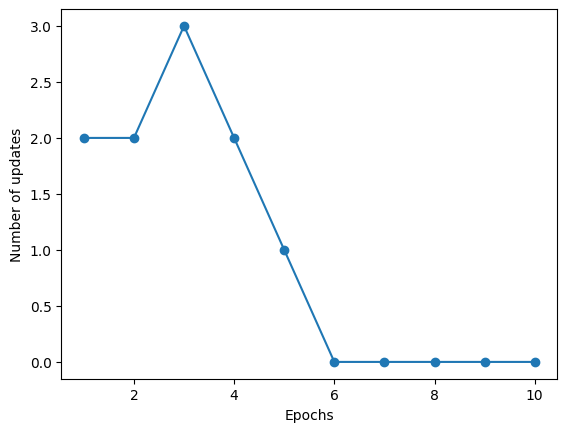

In [263]:
# Creates an instance of the perceptron class with .01 learning rate and an epoch of 10
ppn = Perceptron(eta=0.1, n_iter=10)

# Fits our model
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1),
          ppn.errors_, marker='o')

# Creates labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# Graphs our missclassifcations in the model
plt.show()

In [264]:
def plot_decision_regions(X,y,classifier, resolution=0.02):

    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # Range of the first feature
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # Range of the second feature
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())                          # Sets the x limit on the plot
    plt.ylim(xx2.min(), xx2.max())                          # Sets the y limit on the plot

    # Plot class examples on the graph
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

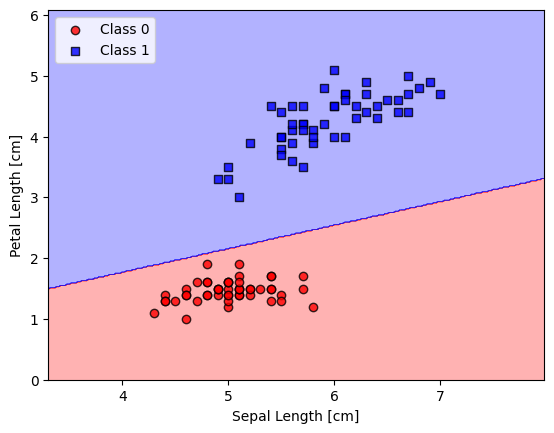

In [265]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc = 'upper left')
plt.show()